<a href="https://colab.research.google.com/github/robsonklug/vinho/blob/main/vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Usando análise química para determinar a qualidade de vinhos

Detalhes do conjunto de dados podem ser encontrdos no portal [CI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine)

<center><img src="https://raw.githubusercontent.com/rauanisanfelice/python-wine/master/img/wine.jpeg", width=500></center> 

Esse dataset contém um conjunto de atributos (dados de sensores) sobre o processo de fabricação de vinhos.
Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho obtido. Existem informações como o teor alcoólico e nível de acidez. 

In [ ]:
#Carregando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#carregando o conjunto de dados
dados = pd.read_csv('winequality-red.csv', sep=';')

# Questão 1
Qual a justificativa em utilizar o **sep=';'** na carga do dados?

**Significa que será usando o caracter ; para selecionar as colunas do arquivo CVS**

# Visualizando o conjunto de dados

In [ ]:
dados.head(-10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1584,6.7,0.32,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.39,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.31,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.61,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


# Verificando informações do conjunto de dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Questão 2 
Quantas instâncias (registros) de vinhos e que atributos (características) cada um deles o conjunto de dados possui?

**Existem 1589 registros (linhas) e 12 atributos (colunas)**

---



# Questão 3
Quantos tipos diferentes de dados existem no conjunto de dados?

**Exsitem 2 tipo, 11 do tipo Float e 1 do tipo Int**

# Questão 4
Algum registro possui valores nulos?

**Não existem valores nulos**

# Uma visão geral do conjunto de dados

In [ ]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Questão 5
Qual é o desvio padrão para a variável "fixed acidity"?

**o valor é 1.741096**

# Questão 6
Qual é a mediana para a variável "residual sugar"?

**O valor é 2.538806**

# Matriz de Correlação de Pearson

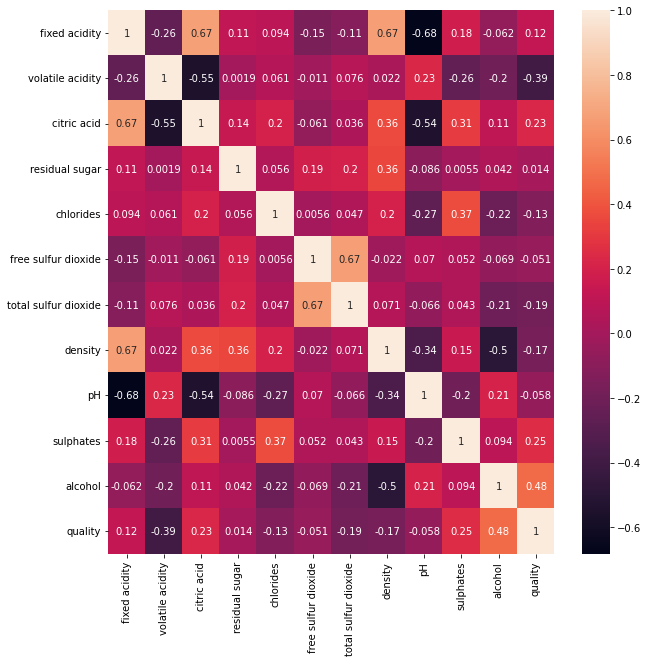

In [ ]:
plt.figure(figsize=(10,10))
matriz_correlacao=dados.corr(method='pearson')
sns.heatmap(matriz_correlacao,annot=True)
plt.show()

# Questão 7
Qual o valor do coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH"?

**Valor = -0.68**

# Questão 7.1
- Qual a interpretação do Coeficiente de Correlação?
- Explique Correlação x Causalidade

O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.
A correlação nos diz a força e direção do relacionamento entre variáveis, mas nada esclarece sobre os motivos desse relacionamento. Já os estudos sobre causalidade conseguem dar um passo além, indicando que a mudança em uma variável causará uma mudança em outra.

# Questão 8
Qual é o valor do coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol" e como podemos [interpretá-la](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) (forte, fraca, etc ...) 



O valor 0,48 de correlação pode ser considerada como uma correlação média. Isso porque as correlações vão de 0 a 1, sendo que quanto menor o número, o correlação é mais baixa (o quanto uma variável implica no valor da outra variável). 



In [ ]:
dados['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Questão 9
- Quantas instâncias existem para a variável 'quality' (qualidade do vinho) com valor igual a 5?    
- O Conjunto de dados é balanceado?
- Quantas classes (qualidade) distintas o conjunto de dados possui?

Existem 681 ocorrencias para o valor igual a 5, da coluna qualidade. 
O conjunto 
Existe um desbalanceamento principalmente quando analisamos os valores de "total sulfur dioxide" e "volatile acidity"
O conjunto possui 6 classes distintas

# Identificando possíveis outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

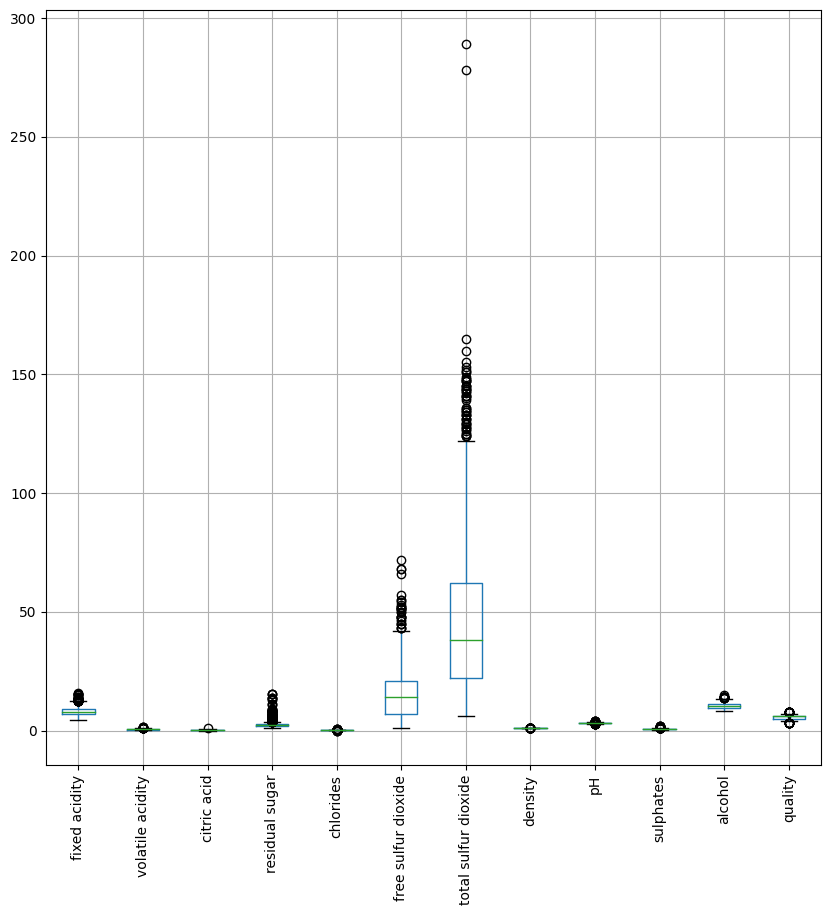

In [ ]:
plt.figure(figsize=(10, 10),dpi=100)
dados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].boxplot()
plt.xticks(rotation='vertical')

# Questão 10

- Observe a figura, consegue identificar os outliers?
- Atente para a escala do lado esquerdo da figura; procure relacionar a escala para cada uma das variáveis.

No gráfico é possível identificar 2 outliers significativos para a variável "total sulfur dioxide".
Como os dados não estão normalizados, o gráfico não permite identificar outros outliers para variáveis que tem o valor muito pequeno.  

# Normalizando os dados

* Assista ao vídeo ...
[![StardXNormal](https://img.youtube.com/vi/NkG_rB4hjh0/hqdefault.jpg)](https://youtu.be/NkG_rB4hjh0 "StanderXNormal")

## Aplicaremos o modelo de normalização MinMaxScaler com os valores "default" para o conjunto de dados

In [ ]:
#Normalização o conjunto de dados.
from sklearn.preprocessing import MinMaxScaler

dataset_values = dados.values
#cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
scaler = MinMaxScaler(feature_range=(0.1, 0.9)) 
dataset = scaler.fit(dataset_values)

#Aplicando a escala, normalizando valores na escala de 0 a 1
dataset = scaler.fit_transform(dataset_values)
#nomeando colunas do novo dataFrame 
colunas = dados.columns 

#cria o dataframe com valore normalizados
dados_normalizados = pd.DataFrame(dataset,columns=[colunas])
dados_normalizados.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.298230,0.417808,0.100,0.154795,0.185476,0.212676,0.179152,0.554038,0.585039,0.210180,0.223077,0.42
1,0.326549,0.516438,0.100,0.193151,0.214858,0.370423,0.272438,0.495301,0.389764,0.267665,0.272308,0.42
2,0.326549,0.450685,0.132,0.176712,0.206845,0.257746,0.235689,0.507048,0.427559,0.253293,0.272308,0.42
3,0.567257,0.187671,0.548,0.154795,0.184140,0.280282,0.252650,0.565786,0.364567,0.219760,0.272308,0.58
4,0.298230,0.417808,0.100,0.154795,0.185476,0.212676,0.179152,0.554038,0.585039,0.210180,0.223077,0.42


# Identificando possíveis outliers com valores normalizados

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text major ticklabel objects>)

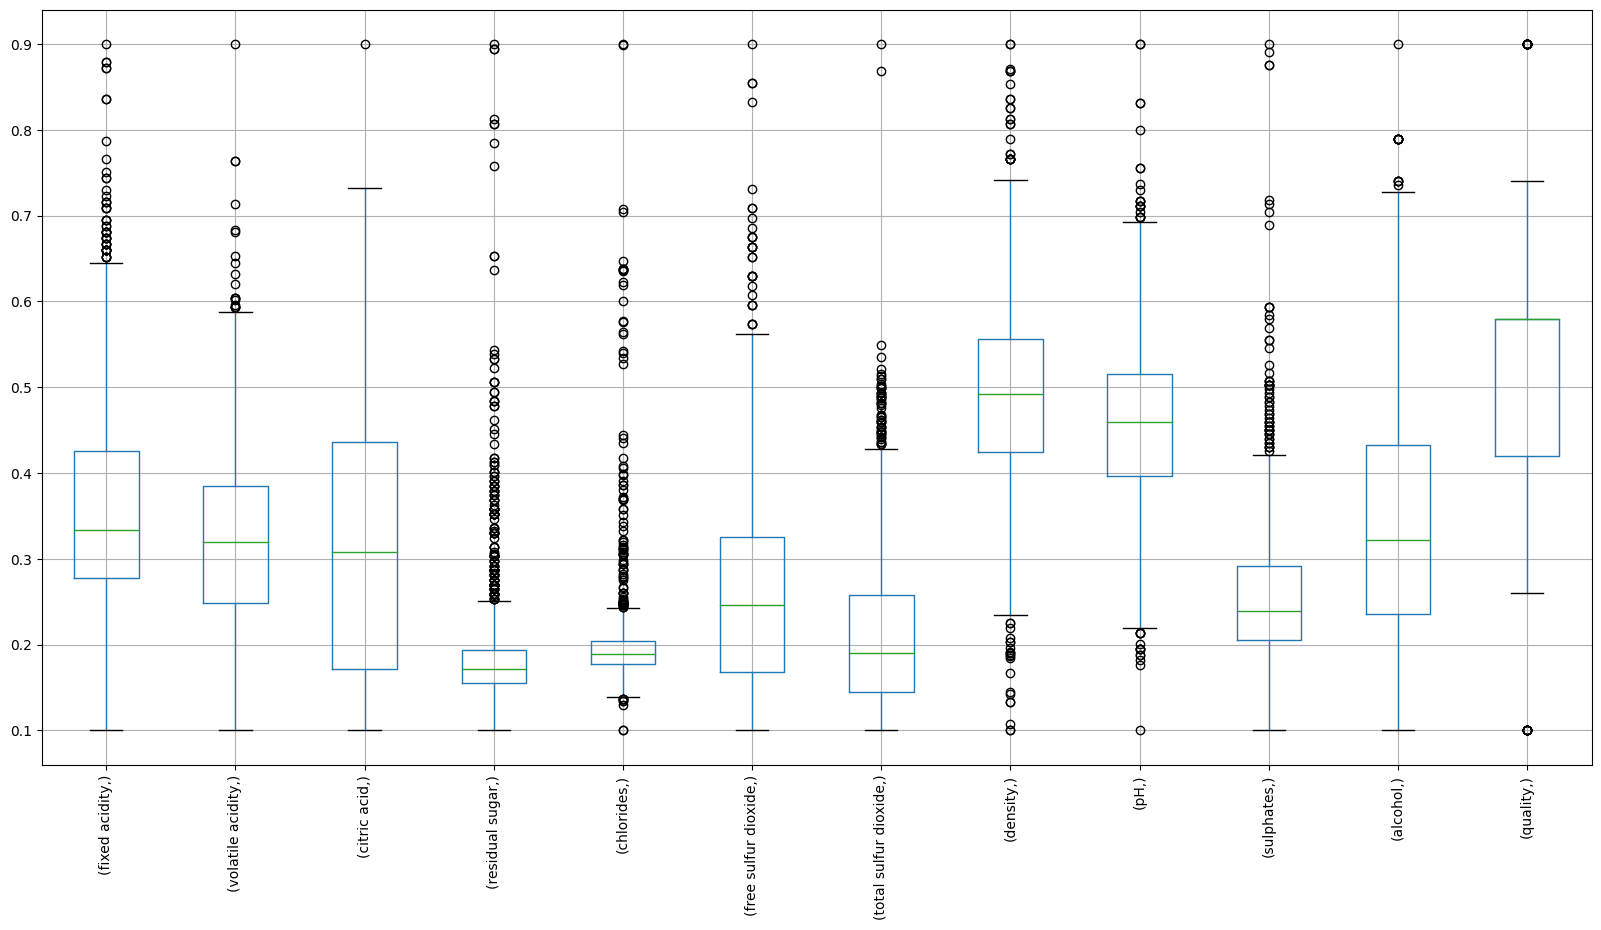

In [ ]:
plt.figure(figsize=(20, 10),dpi=100)
dados_normalizados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].boxplot()
plt.xticks(rotation='vertical')

# Questão 11
- Observe a figura, consegue identificar os outliers?
- Atente para a escala do lado esquerdo da figura; procure relacionar a escala para cada uma das variáveis.
- Compare as visualizações antes e após a normalização.

Com os dados normalizados é possivel observar de modo mais fácil o outliers de cada uma das variávels. 
Os valores do primeiro quartil, a distribuição de 50% dos dados e por fim o último quartil ficou mais claro com a escala normalizada. 
Antes da mormalização era impossivel avaliar os dados e comportamento dos dados. 

# Dividindo o conjunto de dados entre entradas (X) e saídas (y)

In [ ]:
# Seleção das features pelo nome da coluna
X = dados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']].values
y = dados['quality'].values



# Questão 12
Normalize as entradas entre 0 e 1, utilizando **MinMaxScaler**

In [ ]:
#Now seperate the dataset as response variable and feature variabes

dados2 = dados.values

scaler2 = MinMaxScaler(feature_range=(0,1))
dataset2 = scaler2.fit(X)
dataset2 = scaler.fit_transform(X)
colunas2 = dados.columns 

#cria o dataframe com valore normalizados
dados_normalizados = pd.DataFrame(dataset,columns=[colunas2])
dados_normalizados.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.298230,0.417808,0.100,0.154795,0.185476,0.212676,0.179152,0.554038,0.585039,0.210180,0.223077,0.42
1,0.326549,0.516438,0.100,0.193151,0.214858,0.370423,0.272438,0.495301,0.389764,0.267665,0.272308,0.42
2,0.326549,0.450685,0.132,0.176712,0.206845,0.257746,0.235689,0.507048,0.427559,0.253293,0.272308,0.42
3,0.567257,0.187671,0.548,0.154795,0.184140,0.280282,0.252650,0.565786,0.364567,0.219760,0.272308,0.58
4,0.298230,0.417808,0.100,0.154795,0.185476,0.212676,0.179152,0.554038,0.585039,0.210180,0.223077,0.42


# Questão 13
Divida o conjunto de dados em 65% de dados para treinamento e 35% de dados para testes

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(1039, 11) (560, 11) (1039,) (560,)


# Treinando um Algoritmo KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf_KNN = KNeighborsClassifier(n_neighbors=5) 
clf_KNN.fit(X_train, y_train) 
y_pred_KNN = clf_KNN.predict(X_test)
accuracy_KNN = accuracy_score(y_pred_KNN,y_test)
print("Acuracia para classificador KNN: ", accuracy_KNN)


Acuracia para classificador KNN:  0.48392857142857143


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_KNN))

[[  0   0   2   0   0   0]
 [  0   1   9   9   1   0]
 [  0   1 137  90   5   0]
 [  0   1  96 120   8   0]
 [  0   0  19  41  13   0]
 [  0   0   1   6   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


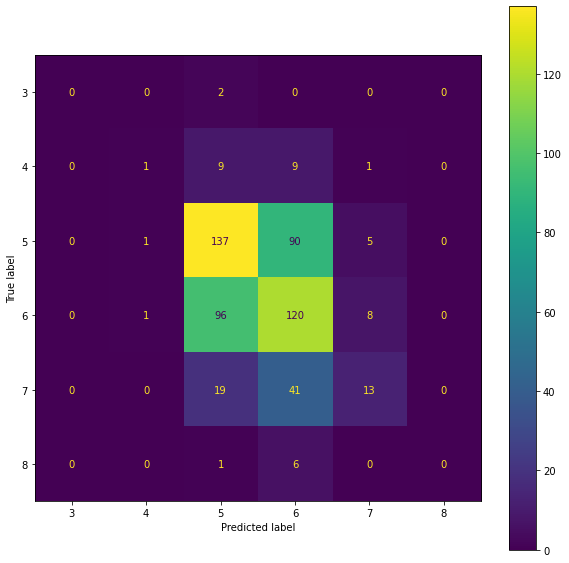

In [ ]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_KNN, X_test, y_test)
plt.show()

In [ ]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.05      0.09        20
           5       0.52      0.59      0.55       233
           6       0.45      0.53      0.49       225
           7       0.48      0.18      0.26        73
           8       0.00      0.00      0.00         7

    accuracy                           0.48       560
   macro avg       0.30      0.22      0.23       560
weighted avg       0.47      0.48      0.46       560



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score

acuracia_KNN = accuracy_score(y_test, y_pred_KNN)

In [ ]:
print(f'A acurária para o KNN é {acuracia_KNN}')

A acurária para o KNN é 0.48392857142857143


# Questão 14
Teste o modelo com outros valores para n_neighbors e compare o resultado.

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(n_jobs=-1)

# Questão 15
- Treine um Algoritmo de Árvore de Decisão utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize DecisionTreeClassifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vou usar na analise de arvore de decisão 
#X_nor = dados_normalizados2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#           'pH', 'sulphates', 'alcohol']].values 
#y_nor = dados_normalizados2['quality'].values

X_nor = dados_normalizados2.drop('quality', axis = 1)
y_nor = dados_normalizados2['quality']


X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(X_nor, y_nor, test_size=0.35, random_state=42)
clf_tree_nor = DecisionTreeClassifier()
clf_tree_nor.fit(X_train_nor, y_train_nor)
y_pred_TREE2 = clf_tree_nor.predict(X_test_nor)
score=clf_tree_nor.score(X_test_nor,y_test_nor)*100; 
acuracia_TREE_nor = accuracy_score(y_test_nor, y_pred_TREE2)
#testing the Decision Tree classifier model
plot_confusion_matrix(clf_tree_nor, X_test_nor, y_test_nor)
plt.show()
print(classification_report(y_test_nor, y_pred_TREE2))
## deu algum problema que não estou conseguindo usar os dados noramalizados de treino no modelo arvore dec.





clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_TREE = clf_tree.predict(X_test)
score=clf_tree.score(X_test,y_test)*100; 
acuracia_TREE = accuracy_score(y_test, y_pred_TREE)
#testing the Decision Tree classifier model
plot_confusion_matrix(clf_tree, X_test, y_test)
plt.show()
print(classification_report(y_test, y_pred_TREE))



KeyError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


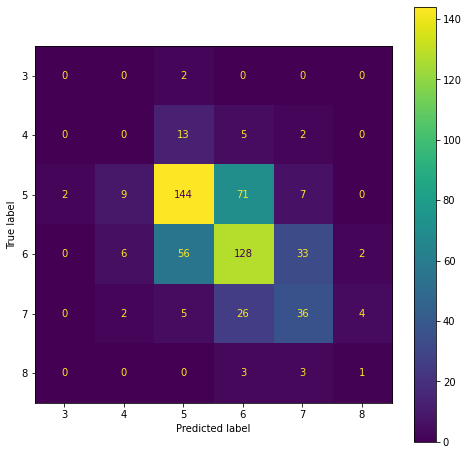

In [ ]:
plt.rcParams["figure.figsize"]=(8, 8)
plot_confusion_matrix(clf_tree, X_test, y_test)
plt.show()

# Questão 16
- Treine um Algoritmo de Floresta Randômica utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize RandomForestClassifier(max_depth=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


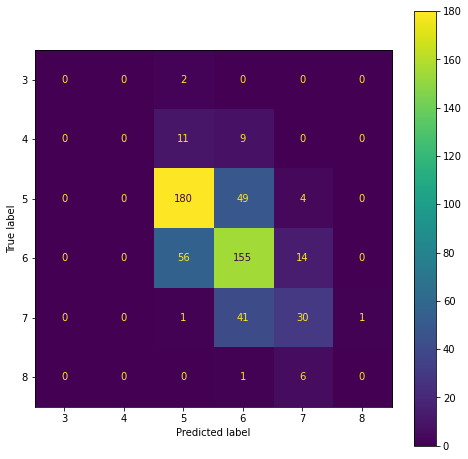

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.72      0.77      0.75       233
           6       0.61      0.69      0.65       225
           7       0.56      0.41      0.47        73
           8       0.00      0.00      0.00         7

    accuracy                           0.65       560
   macro avg       0.31      0.31      0.31       560
weighted avg       0.62      0.65      0.63       560



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_For = RandomForestClassifier(max_depth=10)
clf_For.fit(X_train, y_train)
y_pred_FOR = clf_For.predict(X_test)
#score=clf_For.score(X_test,y_test)*100; 
acuracia_FOR = accuracy_score(y_test, y_pred_FOR)
#testing the Decision Tree classifier model
plot_confusion_matrix(clf_For, X_test, y_test)
plt.show()
print(classification_report(y_test, y_pred_FOR))

In [ ]:
# Tentando usar o cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
RandomForestClassifier(n_estimators=200)
# Predicting Cross Validation Score
cv_rfc = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_rfc.mean())

y_pred_rfc_train =rfc.predict(X_train)
accuracy_rfc_train = accuracy_score(y_train, y_pred_rfc_train)
print("Training set: ", accuracy_rfc_train)

y_pred_rfc_test = rfc.predict(X_test)
accuracy_rfc_test = accuracy_score(y_test, y_pred_rfc_test)
print("Test set: ", accuracy_rfc_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,


CV:  0.682458924570575
Training set:  1.0
Test set:  0.6535714285714286


# Questão 17
- Treine um Algoritmo SVM utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize SVC(gamma='auto', kernel='rbf')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


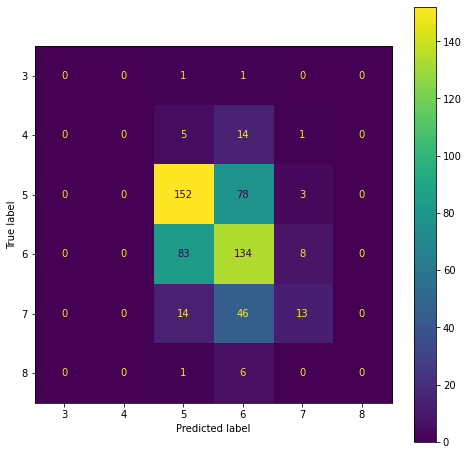

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.59      0.65      0.62       233
           6       0.48      0.60      0.53       225
           7       0.52      0.18      0.27        73
           8       0.00      0.00      0.00         7

    accuracy                           0.53       560
   macro avg       0.27      0.24      0.24       560
weighted avg       0.51      0.53      0.51       560



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## usando o SVC
clf_svc = svm.SVC(C=1.0, gamma='auto', kernel='rbf')
#clf_svc = svm.SVC()
clf_svc.fit(X_train, y_train)
clf_svc.predict(X_test)
clf_svc.score(X_test,y_test)
y_pred_SVC = clf_svc.predict(X_test)
acuracia_SVC = accuracy_score(y_test, y_pred_SVC)

plot_confusion_matrix(clf_svc, X_test, y_test)
plt.show()
print(classification_report(y_test, y_pred_SVC))

# Questão 18
- Treine um Algoritmo MLP utilizando os dados de entrada normalizados.
        - Calcule a acurácia;
        - Apresente a matriz de confusão;
        - Apresente precision | recall | f1-score, utilizando o classification_report;
        - Utilize MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1).

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


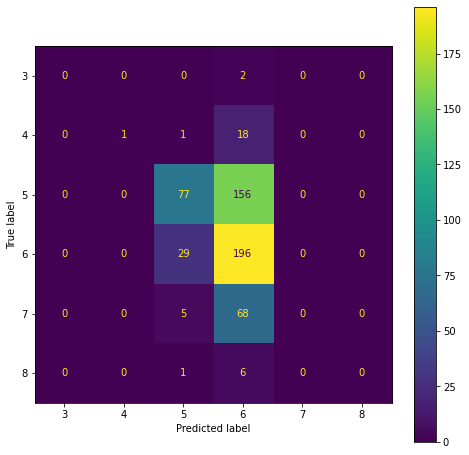

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.05      0.10        20
           5       0.68      0.33      0.45       233
           6       0.44      0.87      0.58       225
           7       0.00      0.00      0.00        73
           8       0.00      0.00      0.00         7

    accuracy                           0.49       560
   macro avg       0.35      0.21      0.19       560
weighted avg       0.50      0.49      0.42       560



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mpl = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mpl.fit(X_train, y_train)
clf_mpl.predict(X_test)
clf_mpl.score(X_test,y_test)
y_pred_mpl = clf_mpl.predict(X_test)
acuracia_MPL = accuracy_score(y_test, y_pred_mpl)

plot_confusion_matrix(clf_mpl, X_test, y_test)
plt.show()
mpl_report = classification_report(y_test, y_pred_mpl)
print(mpl_report)



# Questão 19
- Compare a acurácia de todos os classificadores utilizados.

In [ ]:
print('Acurária KNN    =', acuracia_KNN)
print('Acurária Arvore =', acuracia_TREE)
print('Acurária Forest =', acuracia_FOR)
print('Acurária SVC    =', acuracia_SVC)
print('Acurária MPL    =', acuracia_MPL)



Acurária KNN    = 0.48392857142857143
Acurária Arvore = 0.5571428571428572
Acurária Forest = 0.6357142857142857
Acurária SVC    = 0.5339285714285714
Acurária MPL    = 0.48928571428571427


# Classificador binário (2 classes)

- Vamos modificar nosso conjunto de dados de forma a implmentar um classificador binário, isto é o vinho é bom ou não 2.    
- Consideraremos as qualidades 3, 4 e 5 como vinhos ruins (valor 0). Já as qualidades 6, 7 e 8 serão vinhos bons (valor 1).

In [ ]:
#Fazendo uma cópia dos ados
dados2 = dados.copy()
#Criando a nova coluna e atribuindo valores conforme considerações acima
dados2['new_quality']= dados2['quality'].apply(lambda x: 0 if x<=5 else 1)
#Apagando a coluna qualidade antiga
dados2.drop(labels=['quality'],axis=1, inplace=True)

In [ ]:
dados2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Questão 20
- Para o melhor classificador (maior acurácia) encontrado na questão 19, refaça o processo de:
        - Separação dos daados de entrada e saída;
        - Normalização;
        - Divisão do conjunto de dados (treinamento e testes);
        - Treinamento;
        - Predição; e
        - Métricas de qualidade.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = dados2.drop('new_quality', axis = 1)
y = dados2['new_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Training Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.7973311092577148
Accuracy Score of Training Data is 0.7325

